# 1. Chargement des librairies et paramètres

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# 2. Chargement des données

> **Remarque**  
Deux fichiers présents dans le dossier `data/` ne sont pas inclus dans l’EDA ni la préparation des données :
>
> - `HomeCredit_columns_description.csv` : fichier contenant uniquement la description/glossaire des variables du projet.
> - `sample_submission.csv` : exemple de format de soumission pour Kaggle, ne contenant aucune donnée utile pour l’analyse.
>
> **Ces fichiers sont donc exclus du traitement.**


In [3]:
import os
import pandas as pd

# Dossier des fichiers
DATA_DIR = '/Users/delatouf/Documents/P07_Implementez_un_modele_de_scoring/data'

csv_files = [
    'application_test.csv',
    'application_train.csv',
    'bureau.csv',
    'bureau_balance.csv',
    'credit_card_balance.csv',
    'installments_payments.csv',
    'POS_CASH_balance.csv',
    'previous_application.csv'
]

dfs = {}
for file in csv_files:
    path = os.path.join(DATA_DIR, file)
    if os.path.exists(path):
        dfs[file.replace('.csv', '')] = pd.read_csv(path)
        print(f"{file} chargé : {dfs[file.replace('.csv', '')].shape[0]} lignes, {dfs[file.replace('.csv', '')].shape[1]} colonnes")
    else:
        print(f"ATTENTION : {file} non trouvé dans {DATA_DIR}")

# On travaille principalement sur application_train
application_train = dfs['application_train']


application_test.csv chargé : 48744 lignes, 121 colonnes
application_train.csv chargé : 307511 lignes, 122 colonnes
bureau.csv chargé : 1716428 lignes, 17 colonnes
bureau_balance.csv chargé : 27299925 lignes, 3 colonnes
credit_card_balance.csv chargé : 3840312 lignes, 23 colonnes
installments_payments.csv chargé : 13605401 lignes, 8 colonnes
POS_CASH_balance.csv chargé : 10001358 lignes, 8 colonnes
previous_application.csv chargé : 1670214 lignes, 37 colonnes


# 3. Aperçu rapide des datasets

In [4]:

display(application_train.head())
application_train.info()
application_train.describe()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# 4. Analyse exploratoire (EDA)

## Statistiques descriptives

In [5]:

application_train.describe().T


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


## Analyse de la variable cible (target)

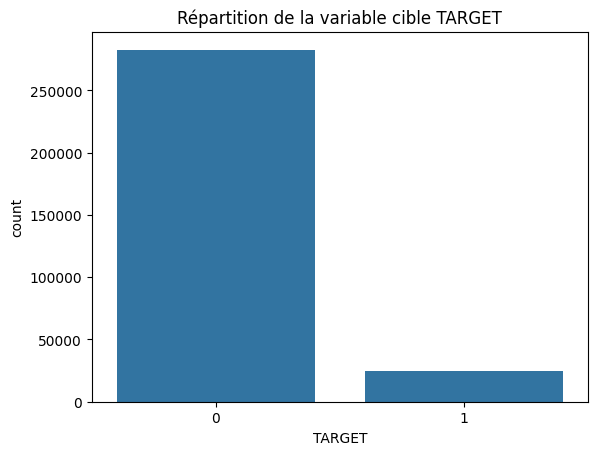

In [6]:

sns.countplot(data=application_train, x='TARGET')
plt.title("Répartition de la variable cible TARGET")
plt.show()


## Corrélation avec la cible et entre features

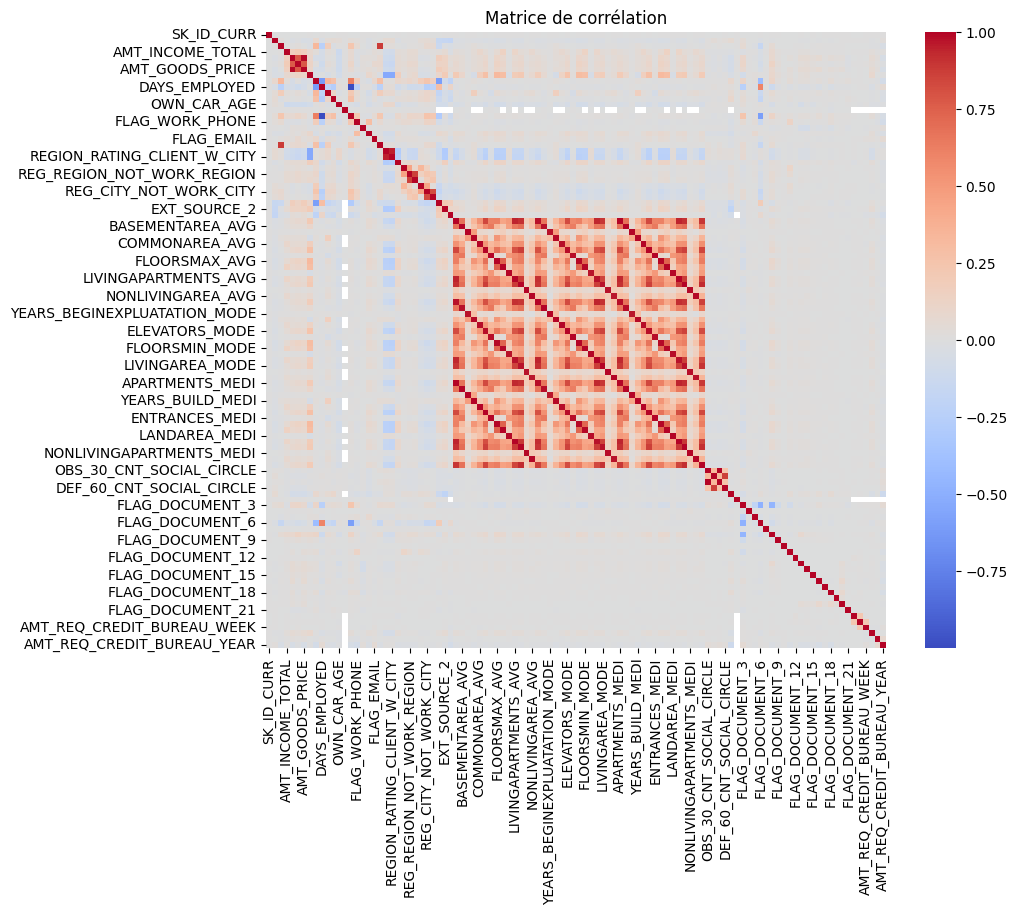

Corrélation avec la cible :


TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
                                 ...   
FLOORSMAX_AVG                 -0.044003
DAYS_EMPLOYED                 -0.044932
EXT_SOURCE_1                  -0.155317
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_3                  -0.178919
Name: TARGET, Length: 106, dtype: float64

In [7]:
# On sélectionne uniquement les colonnes numériques
num_cols = application_train.select_dtypes(include=['number'])

# Matrice de corrélation
corr = num_cols.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation")
plt.show()

# Corrélation avec la cible
corr_target = corr['TARGET'].sort_values(ascending=False)
print("Corrélation avec la cible :")
display(corr_target)


# 5. Analyse des valeurs manquantes

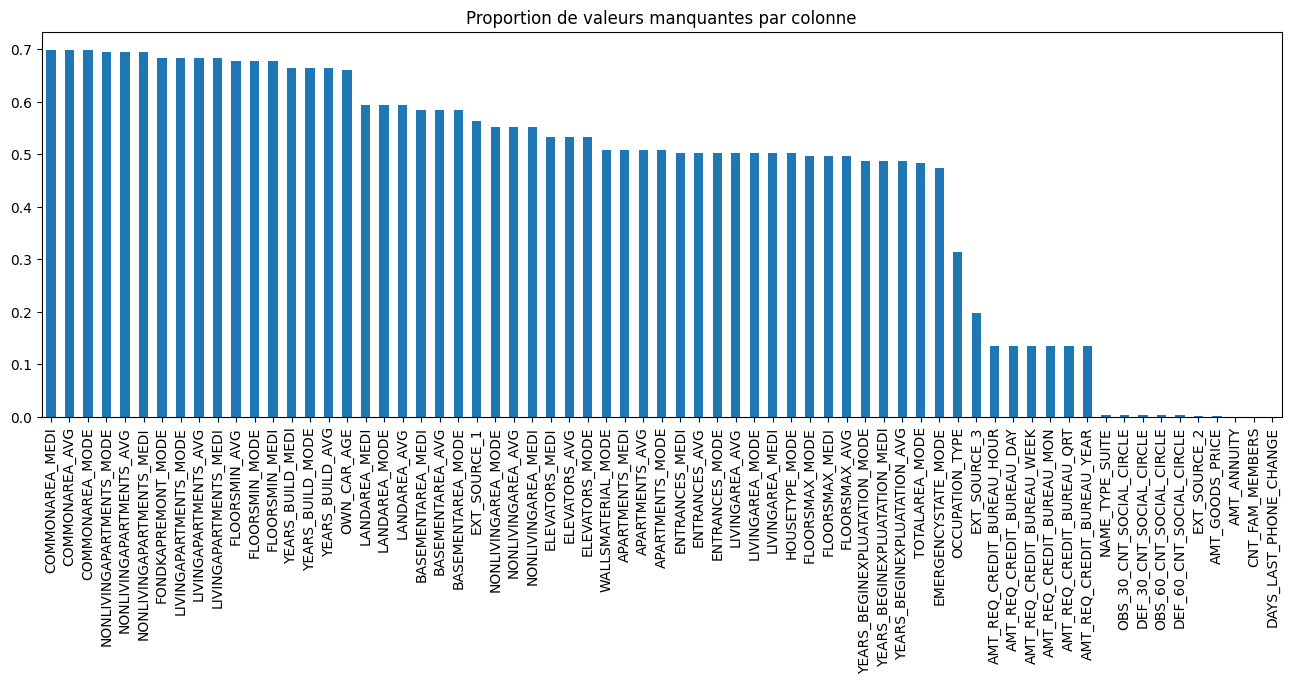

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
                              ...   
EXT_SOURCE_2                0.002146
AMT_GOODS_PRICE             0.000904
AMT_ANNUITY                 0.000039
CNT_FAM_MEMBERS             0.000007
DAYS_LAST_PHONE_CHANGE      0.000003
Length: 67, dtype: float64


In [8]:

missing = application_train.isnull().mean().sort_values(ascending=False)
missing[missing > 0].plot(kind='bar', figsize=(16,5), title='Proportion de valeurs manquantes par colonne')
plt.show()
print(missing[missing > 0])


# 6. Analyse et traitement des outliers

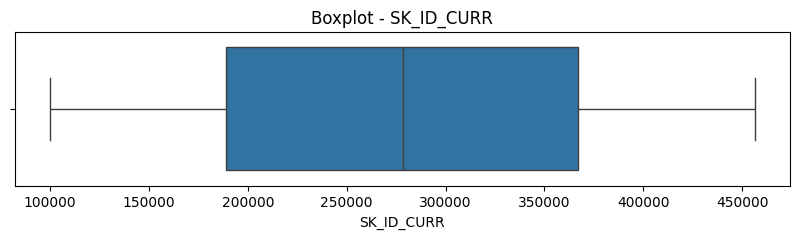

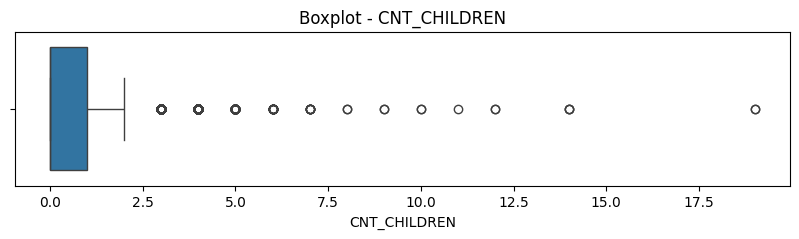

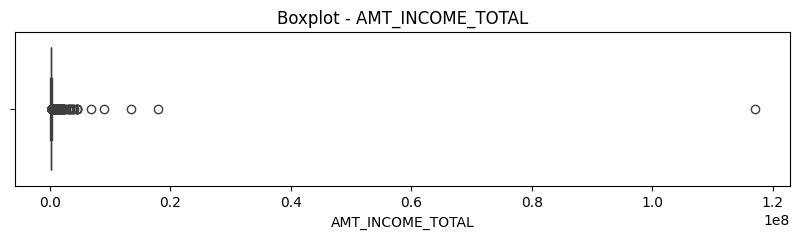

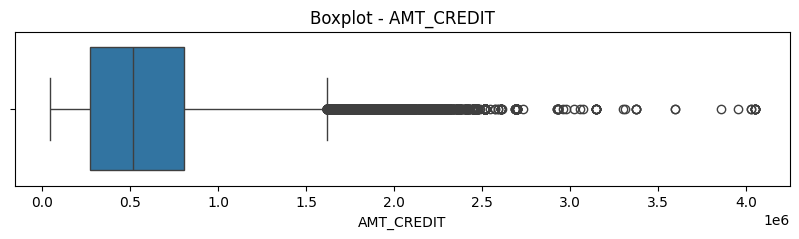

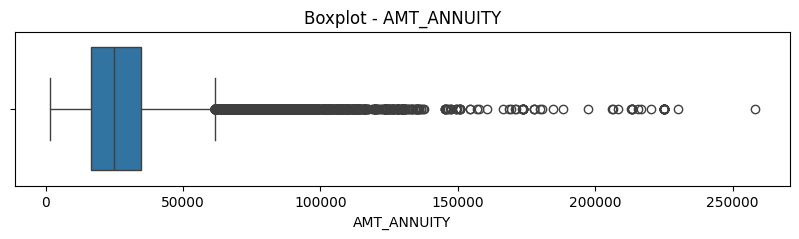

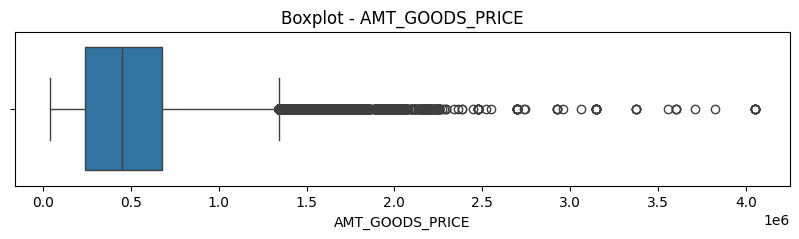

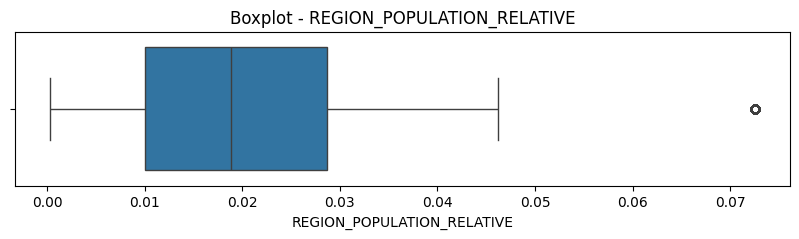

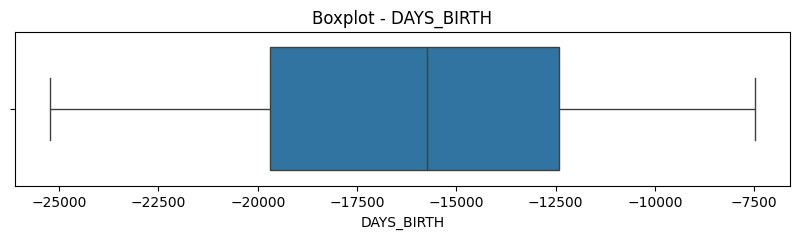

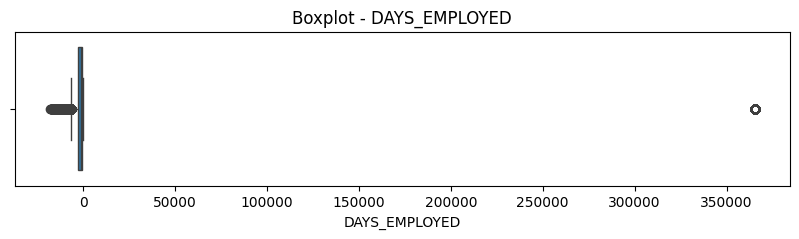

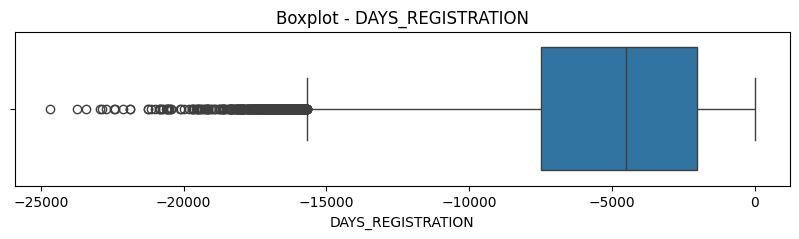

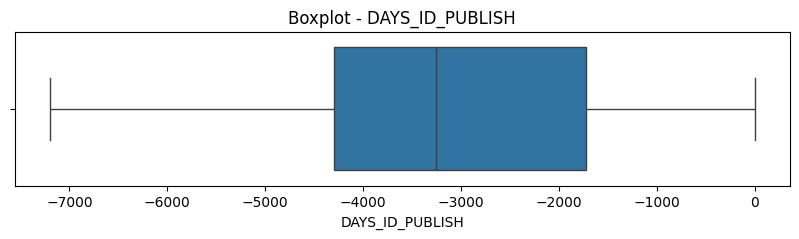

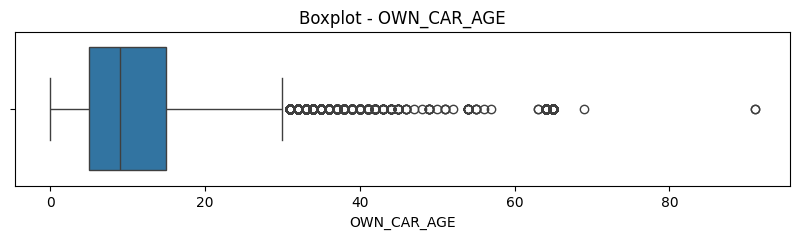

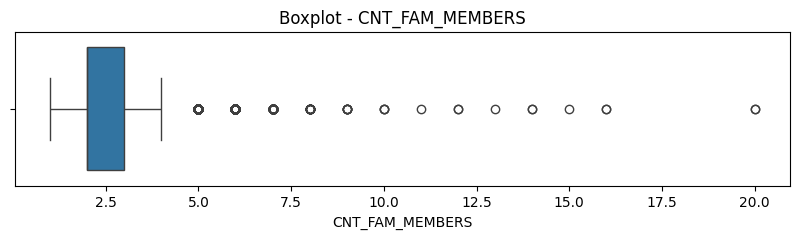

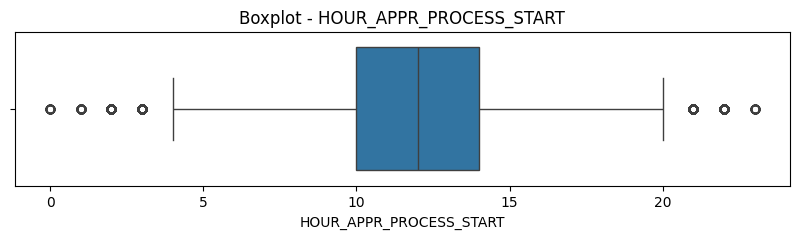

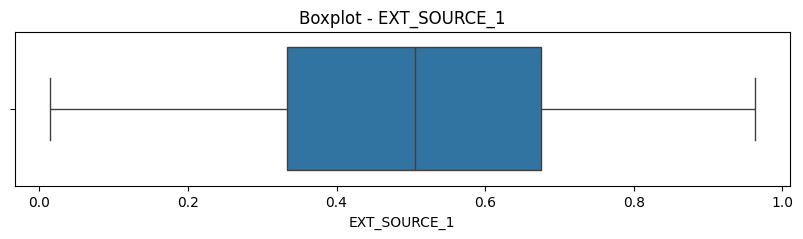

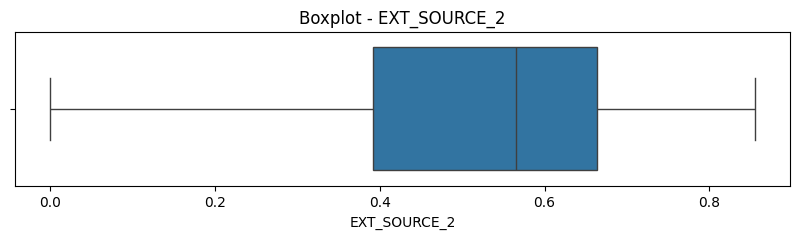

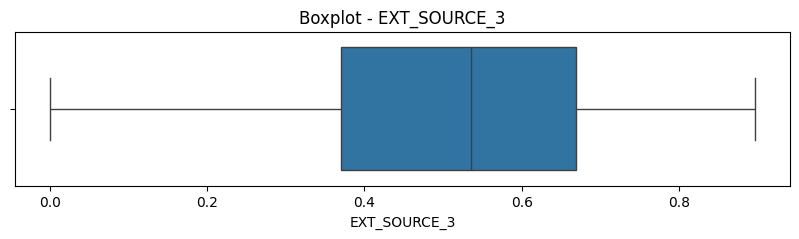

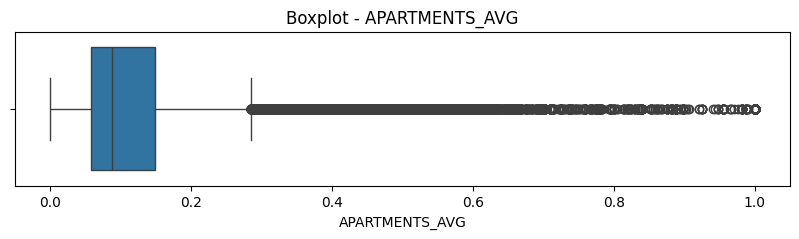

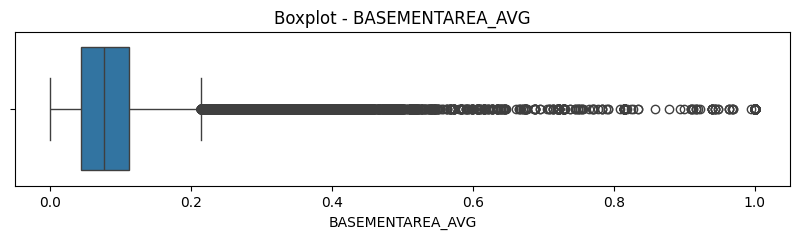

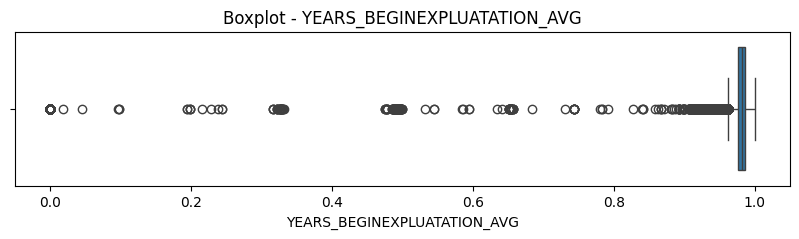

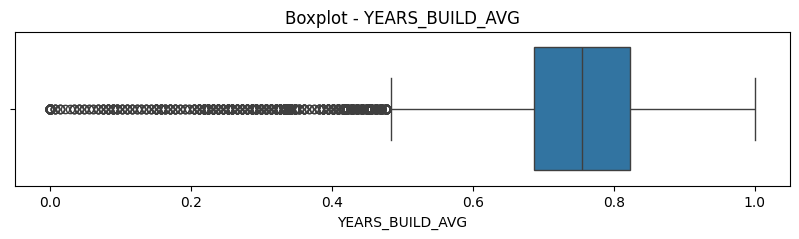

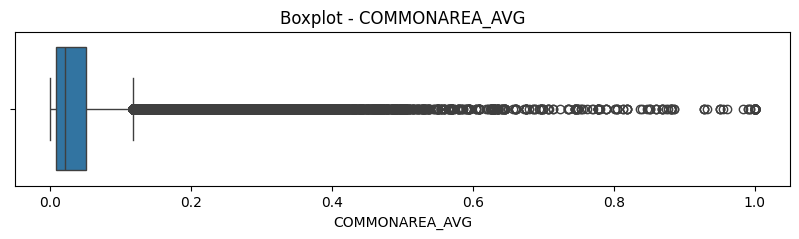

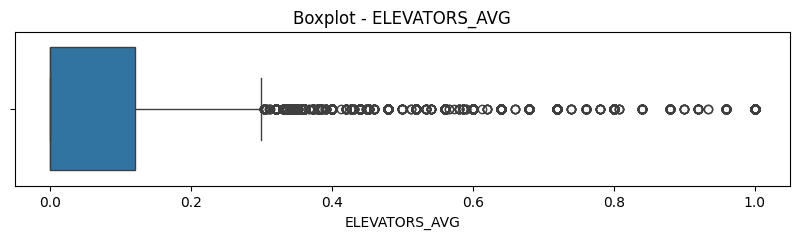

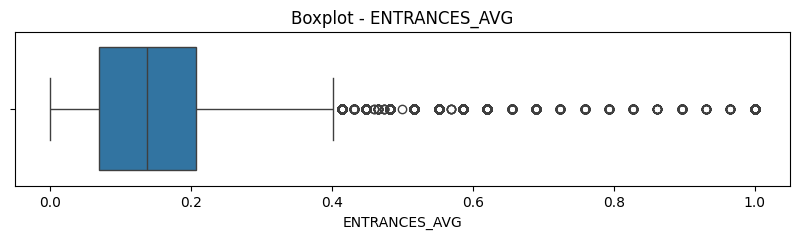

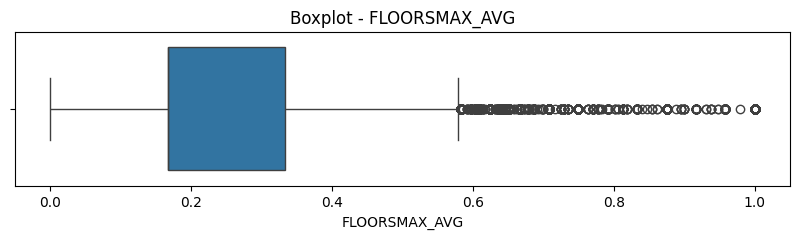

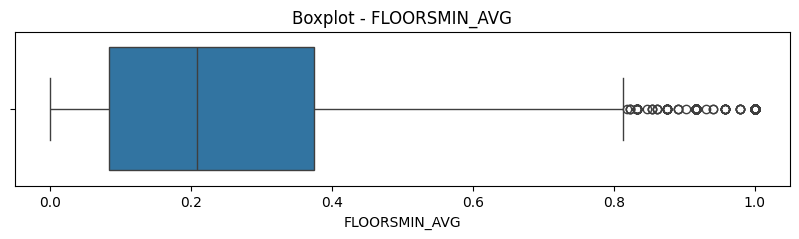

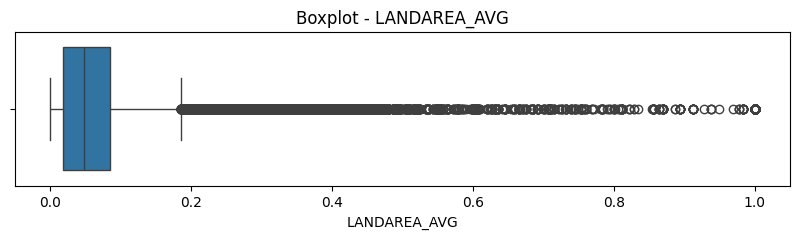

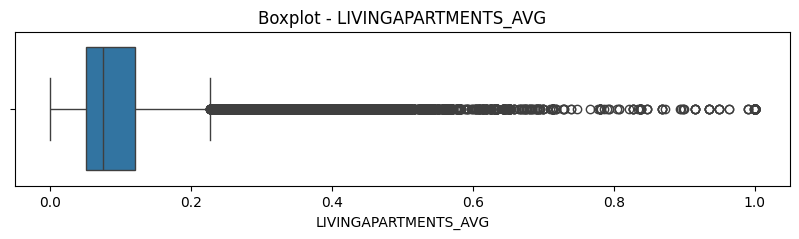

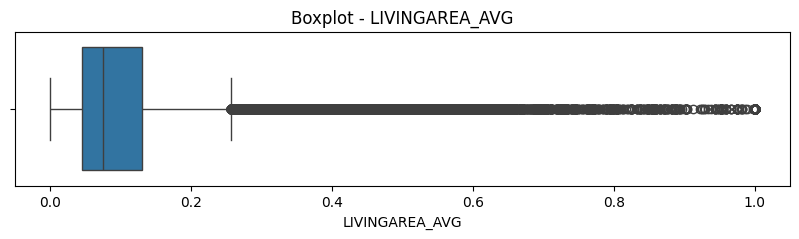

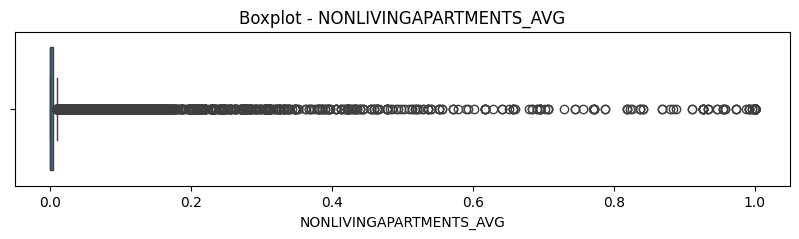

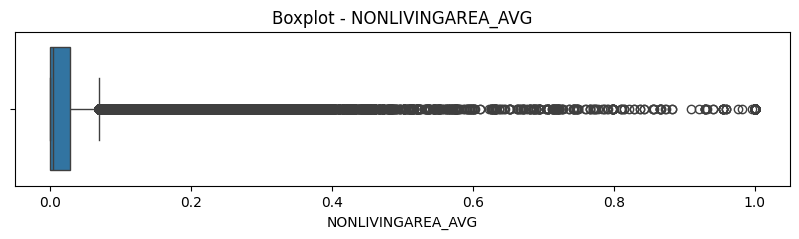

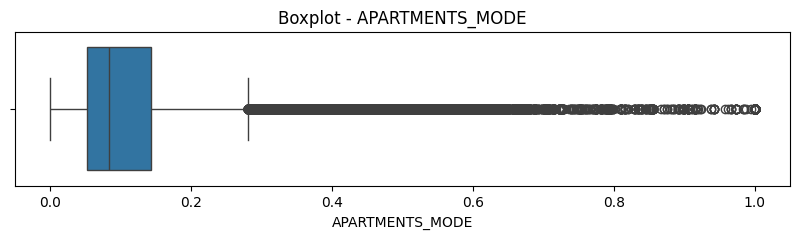

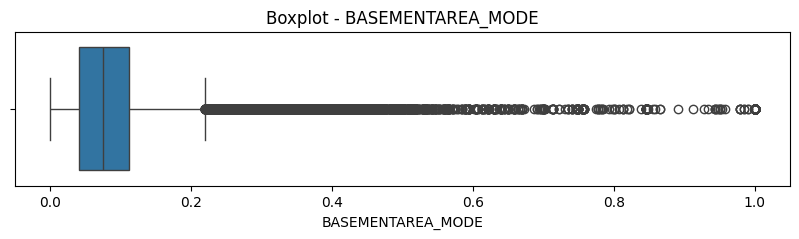

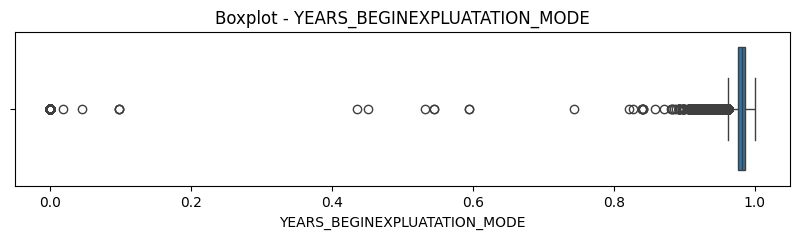

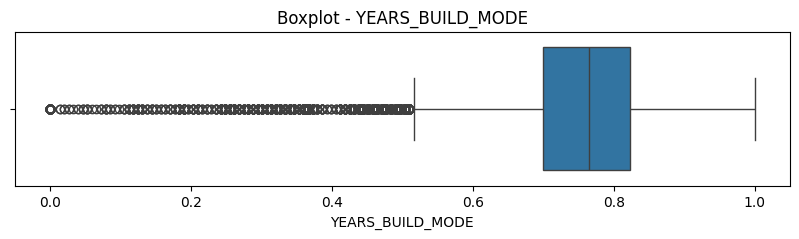

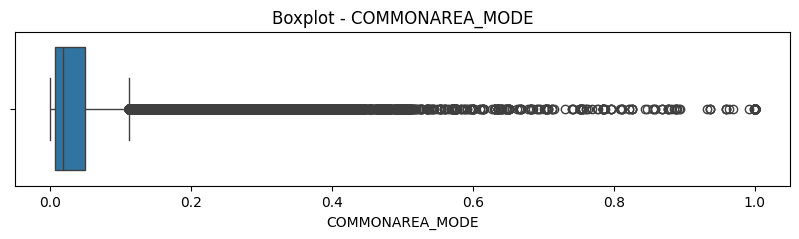

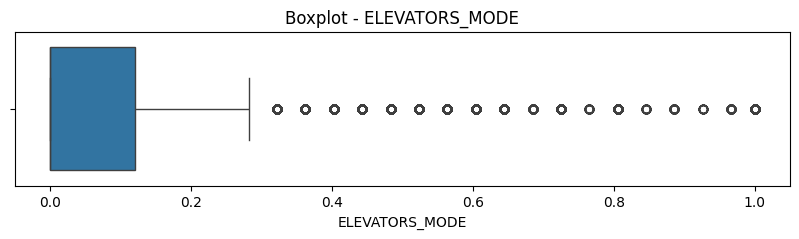

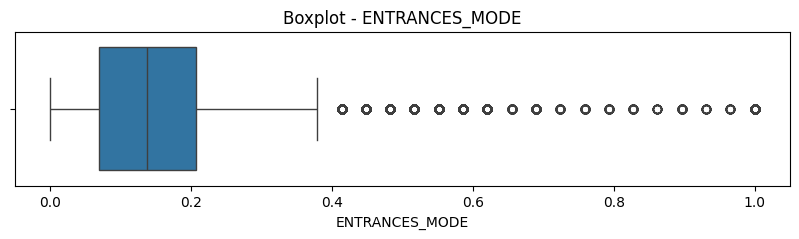

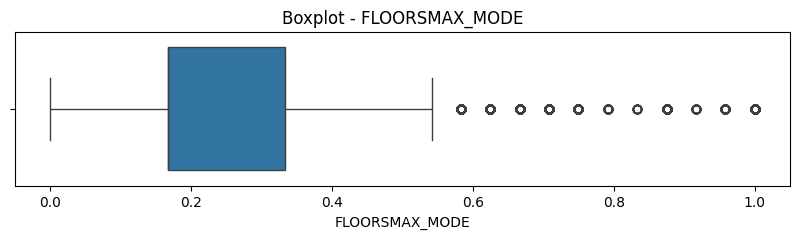

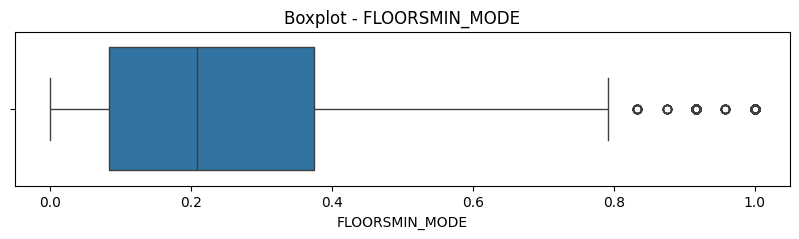

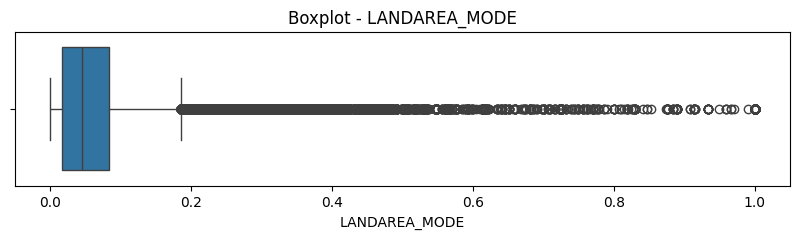

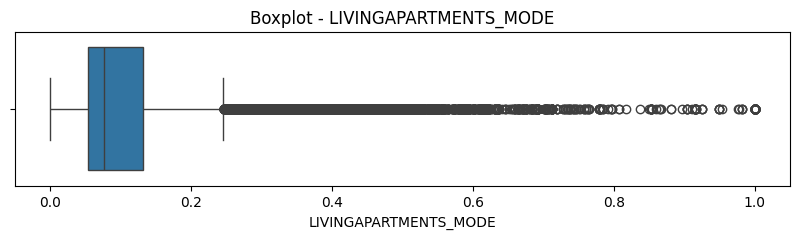

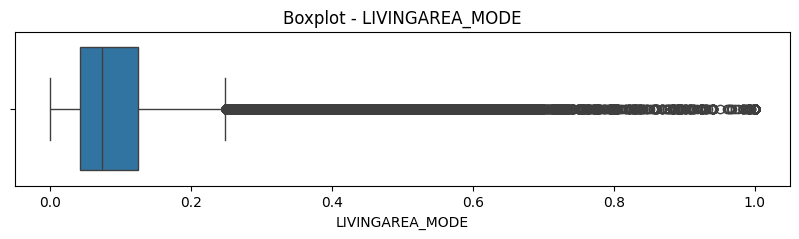

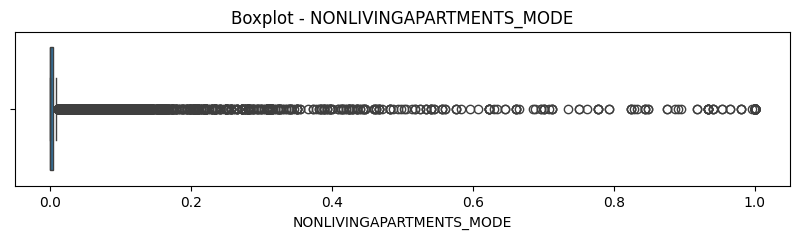

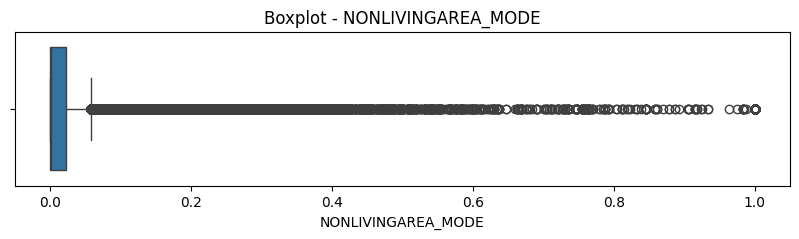

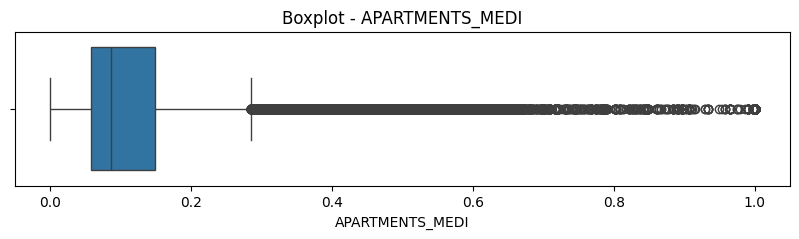

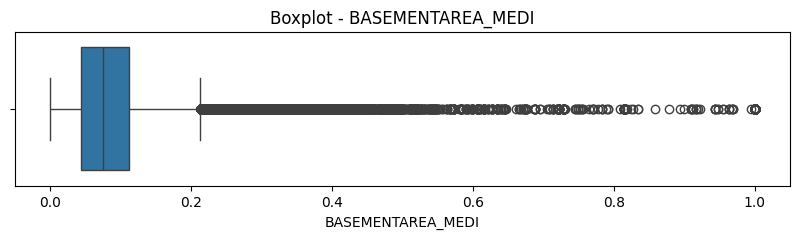

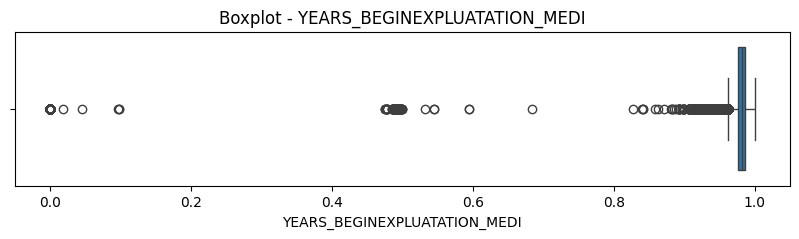

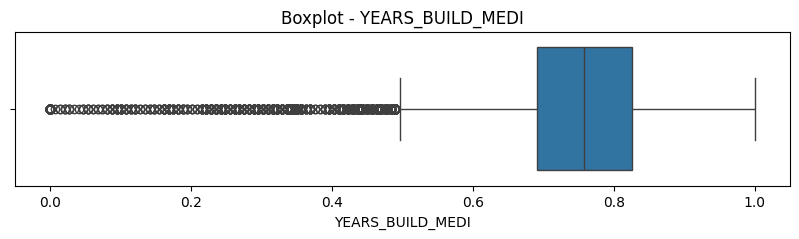

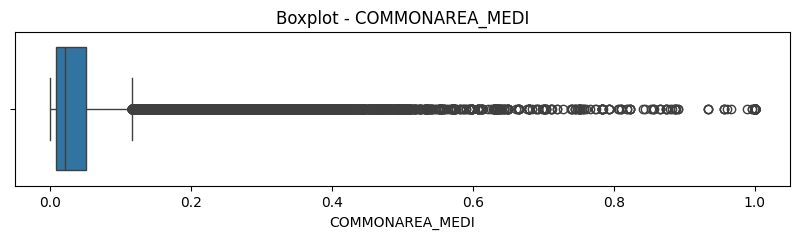

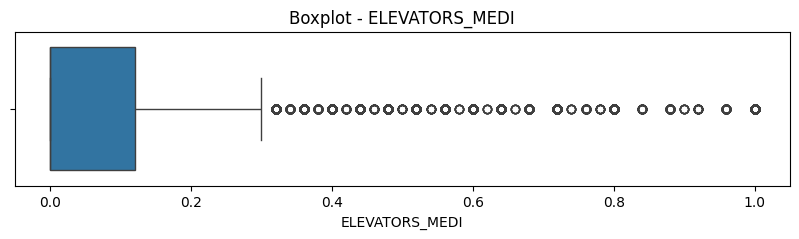

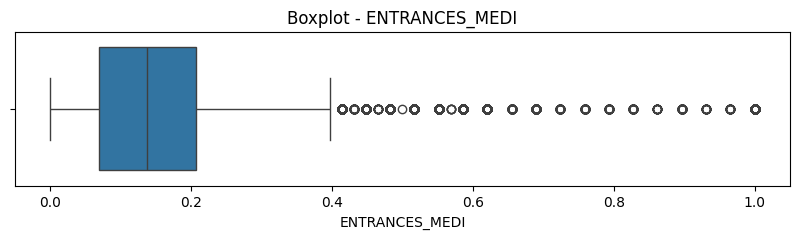

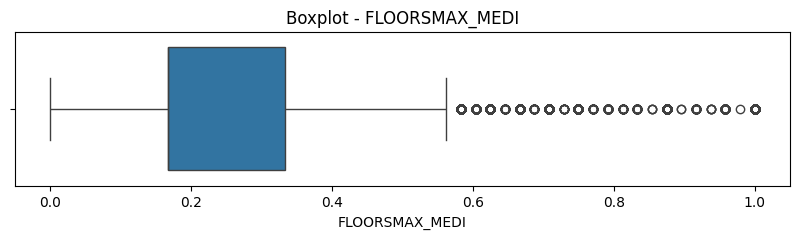

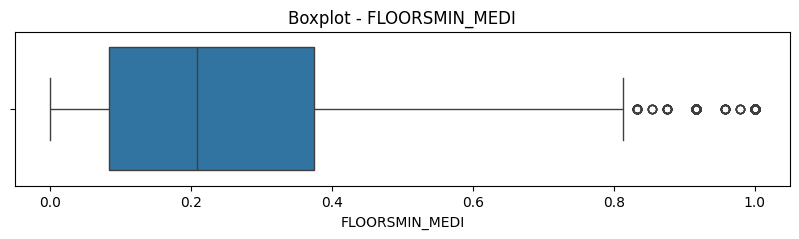

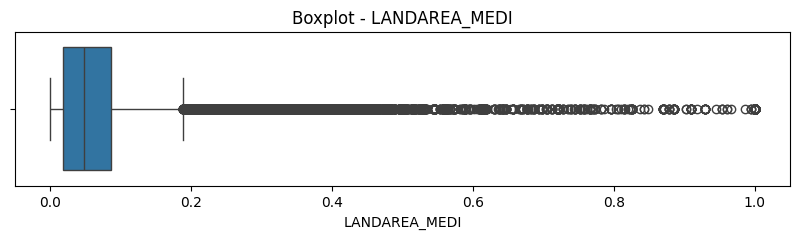

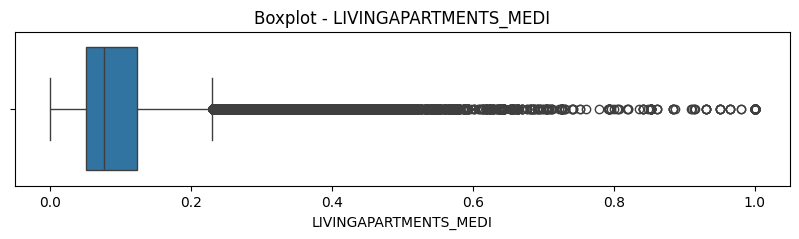

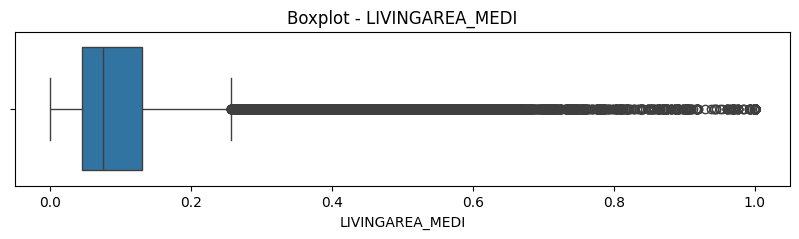

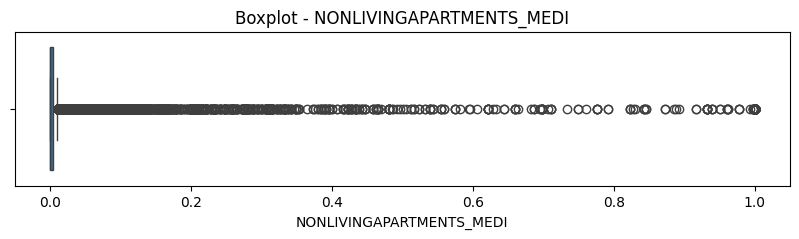

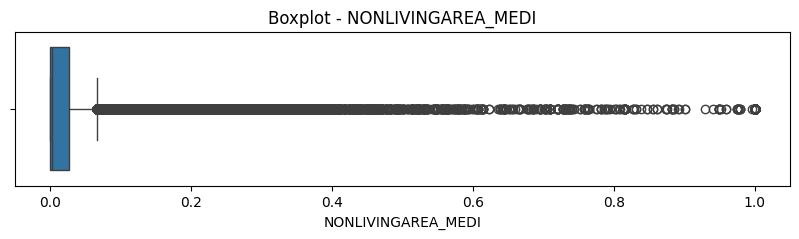

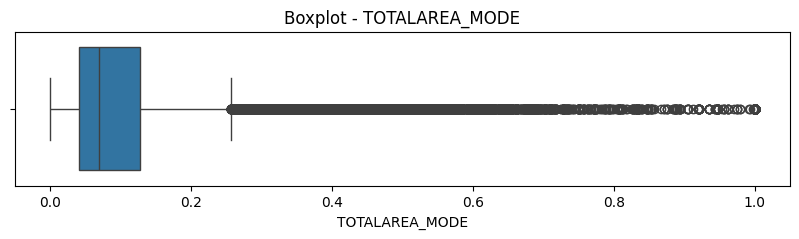

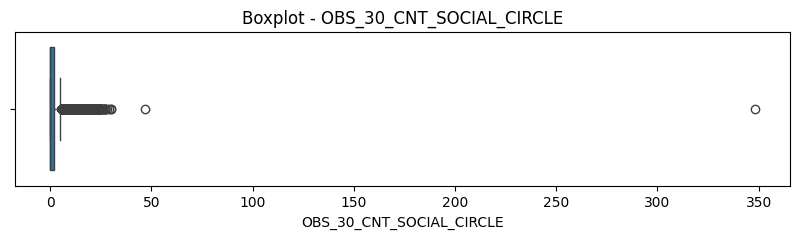

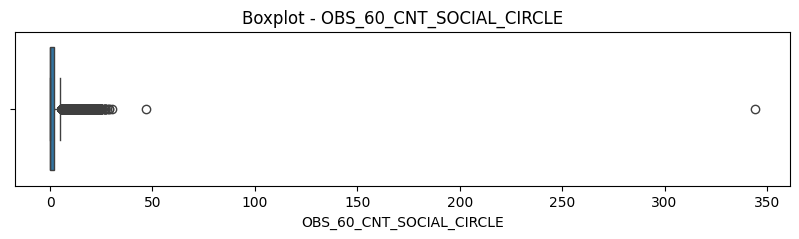

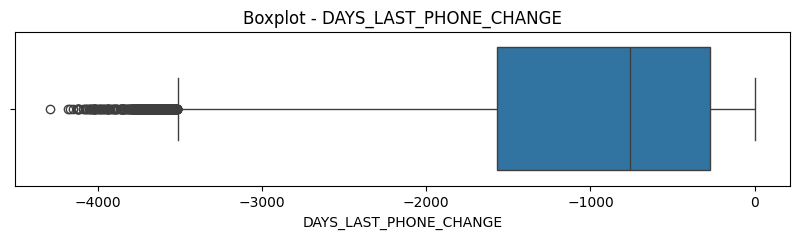

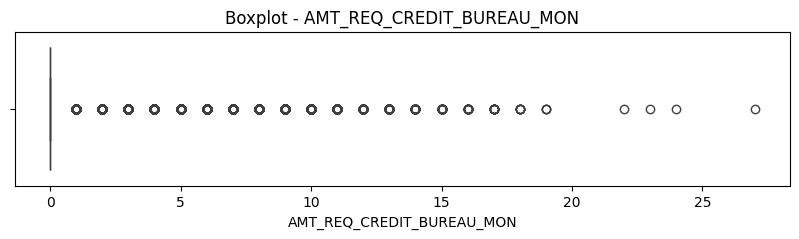

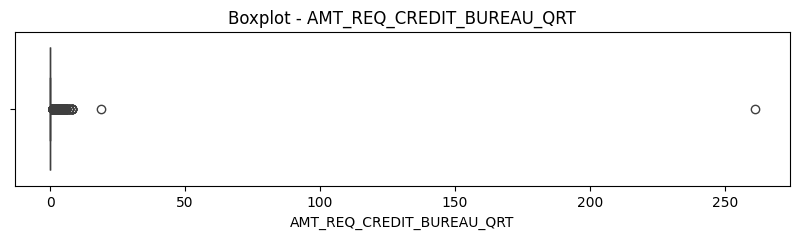

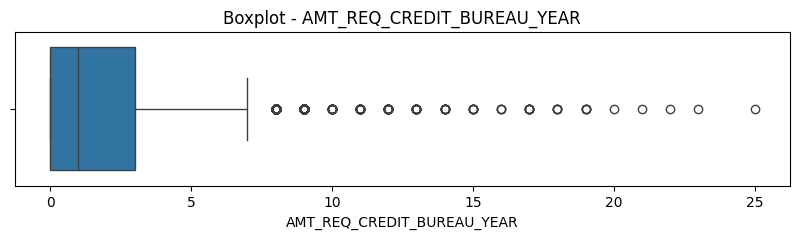

In [9]:

numeric_cols = application_train.select_dtypes(include=np.number).columns
for col in numeric_cols:
    if application_train[col].nunique() > 10:
        plt.figure(figsize=(10,2))
        sns.boxplot(x=application_train[col])
        plt.title(f"Boxplot - {col}")
        plt.show()


# 7. Suppression/Imputation des valeurs manquantes

In [10]:

# Suppression des colonnes avec >30% de NA
missing_thresh = 0.3
cols_to_drop = application_train.columns[application_train.isnull().mean() > missing_thresh]
train_clean = application_train.drop(columns=cols_to_drop)
print(f"Colonnes supprimées (>{missing_thresh*100}% de NA): {list(cols_to_drop)}")

# Imputation simple (numérique: médiane, catégoriel: mode)
for col in train_clean.select_dtypes(include='number'):
    train_clean[col].fillna(train_clean[col].median(), inplace=True)
for col in train_clean.select_dtypes(include='object'):
    train_clean[col].fillna('MISSING', inplace=True)


Colonnes supprimées (>30.0% de NA): ['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTA

/var/folders/6t/_4tfp3815r5g5lb0qm81sjcr0000gn/T/ipykernel_10834/1643324722.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_clean[col].fillna(train_clean[col].median(), inplace=True)
/var/folders/6t/_4tfp3815r5g5lb0qm81sjcr0000gn/T/ipykernel_10834/1643324722.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

# 8. Détection et suppression des doublons

In [11]:

avant = train_clean.shape[0]
train_clean = train_clean.drop_duplicates()
print(f"Doublons supprimés : {avant - train_clean.shape[0]}")


Doublons supprimés : 0


# 9. Vérification finale du dataset

In [12]:

train_clean.info()
train_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# 10. Encodage & normalisation des features

In [13]:

# Encodage one-hot (catégoriel)
train_final = pd.get_dummies(train_clean, drop_first=True)

# Normalisation (optionnel, exemple MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols = train_final.select_dtypes(include=np.number).columns
train_final[num_cols] = scaler.fit_transform(train_final[num_cols])


## 11. Création de nouvelles variables agrégées à partir des jeux de données secondaires

Dans cette étape, nous enrichissons le jeu principal en ajoutant des variables agrégées issues des fichiers secondaires (bureau, previous_application, installments), pour améliorer la performance des modèles de scoring.


#### Agrégats sur `bureau.csv`
On crée des variables résumant le nombre, le montant total et moyen des crédits externes, ainsi que le total des montants en retard chez d'autres établissements.



In [14]:

bureau = dfs['bureau']  

# Vérification colonne
assert 'SK_ID_CURR' in bureau.columns, "'SK_ID_CURR' absent de bureau.csv"

# Création des agrégats
bureau_agg = bureau.groupby('SK_ID_CURR').agg(
    nb_bureau_credit=('SK_ID_BUREAU', 'count'),
    montant_total_credit_bureau=('AMT_CREDIT_SUM', 'sum'),
    montant_credit_moyen_bureau=('AMT_CREDIT_SUM', 'mean'),
    montant_en_retard=('AMT_CREDIT_SUM_OVERDUE', 'sum')
).reset_index()

# Merger avec application_train 
application_train = application_train.merge(bureau_agg, how='left', on='SK_ID_CURR')


#### Agrégats sur `previous_application.csv`
On ajoute le nombre de demandes précédentes, le taux de refus et le montant moyen demandé pour chaque client.


In [15]:
previous = pd.read_csv('../data/previous_application.csv')

assert 'SK_ID_CURR' in previous.columns, "SK_ID_CURR absent de previous_application.csv"

previous_agg = previous.groupby('SK_ID_CURR').agg(
    nb_previous=('SK_ID_PREV', 'count'),
    taux_refus=('NAME_CONTRACT_STATUS', lambda x: (x == 'Refused').sum() / len(x) if len(x) > 0 else 0),
    montant_moyen_pret=('AMT_APPLICATION', 'mean')
).reset_index()

application_train = application_train.merge(previous_agg, how='left', on='SK_ID_CURR')


#### Agrégats sur `installments_payments.csv`
On calcule le nombre de paiements, le retard moyen et le nombre de paiements réalisés en retard pour chaque client.


In [16]:
import pandas as pd

# Agrégats sur installments_payments.csv

# Charger installments_payments.csv 
installments = pd.read_csv('../data/installments_payments.csv')

assert 'SK_ID_CURR' in installments.columns, "SK_ID_CURR absent de installments_payments.csv"

# Création des agrégats
installments_agg = installments.groupby('SK_ID_CURR').agg(
    nb_paiements=('NUM_INSTALMENT_NUMBER', 'count'),  # nombre de paiements
    retard_moyen=('DAYS_ENTRY_PAYMENT', lambda x: (x < 0).mean()),  # % de paiements en retard
    montant_paiement_moyen=('AMT_PAYMENT', 'mean')  # montant moyen payé
).reset_index()


application_train = application_train.merge(installments_agg, how='left', on='SK_ID_CURR')


In [17]:
# Export du dataset train nettoyé et enrichi
application_train.to_csv('../data_processed/application_train_clean.csv', index=False)

